# Phishing Website Detection - Complete Analysis
## Comprehensive 3-Week Project Implementation

**Intern Name:** Shete Rupesh Sanjay  
**Internship Program:** CodeB – Data Science Internship  
**Project Duration:** Weeks 1-3  
**Date:** February 2026

---

## Project Overview

This notebook combines all three weeks of the Phishing Detection project:
- **Week 1:** Dataset Exploration & Initial EDA
- **Week 2:** Descriptive Statistics & Visual Analysis
- **Week 3:** Data Preprocessing & Model Preparation

### Objectives
1. Load and explore the phishing detection dataset
2. Perform comprehensive exploratory data analysis
3. Generate descriptive statistics and visualizations
4. Clean and preprocess data for modeling
5. Prepare final datasets for machine learning

---

# Part 1: Setup and Data Loading
## Import Required Libraries

In [22]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Load Dataset

In [23]:
# Load the phishing detection dataset
df = pd.read_csv("dataset_phishing.csv")
print("DATASET LOADED SUCCESSFULLY")
print(f"Dataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]:,}")
print(f"Number of Features: {df.shape[1]}")

DATASET LOADED SUCCESSFULLY
Dataset Shape: (11430, 89)
Number of Records: 11,430
Number of Features: 89


---
# WEEK 1: Dataset Exploration & Initial EDA
---

## 1.1 Basic Dataset Information

In [24]:
# Display first few rows
print("\n First 5 Rows of Dataset:")
display(df.head())


 First 5 Rows of Dataset:


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.75,7.00,4.50,0,0,0,0,0,0,17,0.53,0.47,0,0,0,0.88,0,0.50,0,0,80.00,0,100.00,0.00,0,0,0,0.00,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.22,0.00,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.75,19.00,14.67,0,0,0,0,0,0,30,0.97,0.03,0,0,0,0.00,0,0.00,0,0,100.00,0,80.00,20.00,0,0,0,100.00,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.15,0.00,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.25,8.40,8.14,0,0,0,0,0,0,4,1.00,0.00,0,0,0,0.00,0,0.00,0,0,100.00,0,0.00,0.00,0,0,0,100.00,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.00,0.00,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.00,5.00,0.00,0,0,0,0,0,0,149,0.97,0.03,0,0,0,0.25,0,0.25,0,0,100.00,0,96.43,3.57,0,0,0,62.50,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.00,0.00,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.33,5.00,7.00,0,0,0,0,0,0,102,0.47,0.53,0,0,0,0.54,0,0.02,1,0,76.47,0,0.00,100.00,0,0,0,0.00,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
# Data types and memory usage
print("\n Dataset Information:")
df.info()

In [25]:
# Display all column names
print("\n All Feature Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")
print(f"Total Features: {len(df.columns)}")


 All Feature Names:
 1. url
 2. length_url
 3. length_hostname
 4. ip
 5. nb_dots
 6. nb_hyphens
 7. nb_at
 8. nb_qm
 9. nb_and
10. nb_or
11. nb_eq
12. nb_underscore
13. nb_tilde
14. nb_percent
15. nb_slash
16. nb_star
17. nb_colon
18. nb_comma
19. nb_semicolumn
20. nb_dollar
21. nb_space
22. nb_www
23. nb_com
24. nb_dslash
25. http_in_path
26. https_token
27. ratio_digits_url
28. ratio_digits_host
29. punycode
30. port
31. tld_in_path
32. tld_in_subdomain
33. abnormal_subdomain
34. nb_subdomains
35. prefix_suffix
36. random_domain
37. shortening_service
38. path_extension
39. nb_redirection
40. nb_external_redirection
41. length_words_raw
42. char_repeat
43. shortest_words_raw
44. shortest_word_host
45. shortest_word_path
46. longest_words_raw
47. longest_word_host
48. longest_word_path
49. avg_words_raw
50. avg_word_host
51. avg_word_path
52. phish_hints
53. domain_in_brand
54. brand_in_subdomain
55. brand_in_path
56. suspecious_tld
57. statistical_report
58. nb_hyperlinks
59. ratio

## 1.2 Missing Values & Duplicates Analysis

In [26]:
# Check for missing values
print("\n Missing Values Analysis:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print(" No missing values found in the dataset!")


 Missing Values Analysis:
 No missing values found in the dataset!


In [27]:
# Check for duplicate rows
print("\n Duplicate Records Analysis:")
duplicate_count = df.duplicated().sum()
duplicate_percent = (duplicate_count / len(df)) * 100
print(f"Total Duplicate Rows: {duplicate_count}")
print(f"Percentage of Duplicates: {duplicate_percent:.2f}%")


 Duplicate Records Analysis:
Total Duplicate Rows: 0
Percentage of Duplicates: 0.00%


## 1.3 Target Variable Analysis

In [28]:
# Identify target variable (likely 'status' or last column)
target_col = df.columns[-1]  # Assuming last column is target
print(f"\n Target Variable: '{target_col}'")

# Target distribution
print("\nClass Distribution:")
target_dist = df[target_col].value_counts()
print(target_dist)
print("\nPercentage Distribution:")
print(df[target_col].value_counts(normalize=True) * 100)


 Target Variable: 'status'

Class Distribution:
status
legitimate    5715
phishing      5715
Name: count, dtype: int64

Percentage Distribution:
status
legitimate   50.00
phishing     50.00
Name: proportion, dtype: float64


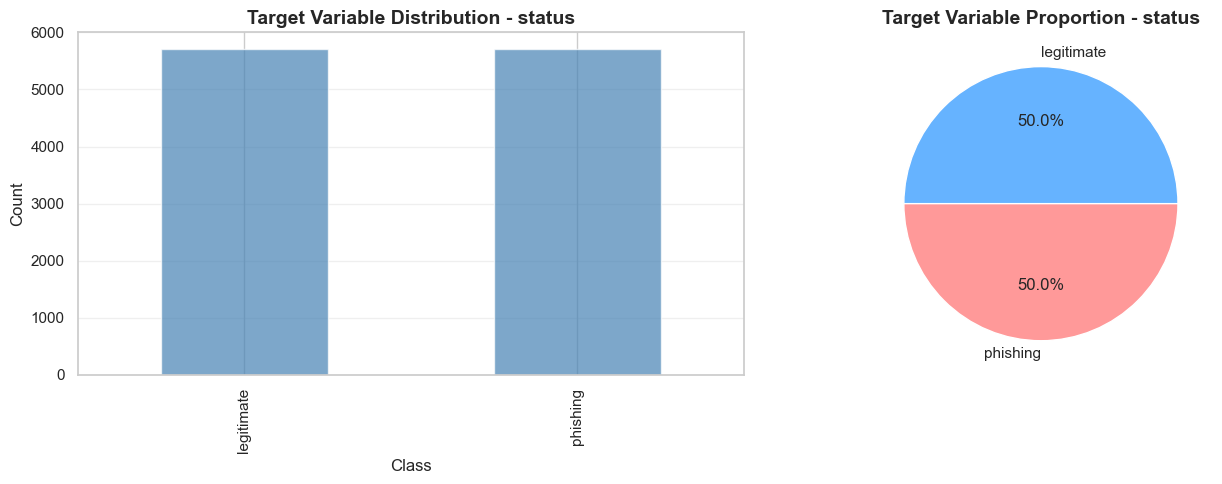


 Insight: Dataset balance is important for classification tasks.
   A balanced dataset (50-50) is ideal for binary classification.


In [29]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df[target_col].value_counts().plot(kind='bar', ax=axes[0], color='steelblue', alpha=0.7)
axes[0].set_title(f'Target Variable Distribution - {target_col}', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].grid(True, alpha=0.3, axis='y')

# Pie chart
df[target_col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], 
                                        colors=['#66b3ff', '#ff9999'])
axes[1].set_title(f'Target Variable Proportion - {target_col}', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\n Insight: Dataset balance is important for classification tasks.")
print("   A balanced dataset (50-50) is ideal for binary classification.")

## 1.4 Feature Correlation Analysis


Feature Correlation Heatmap


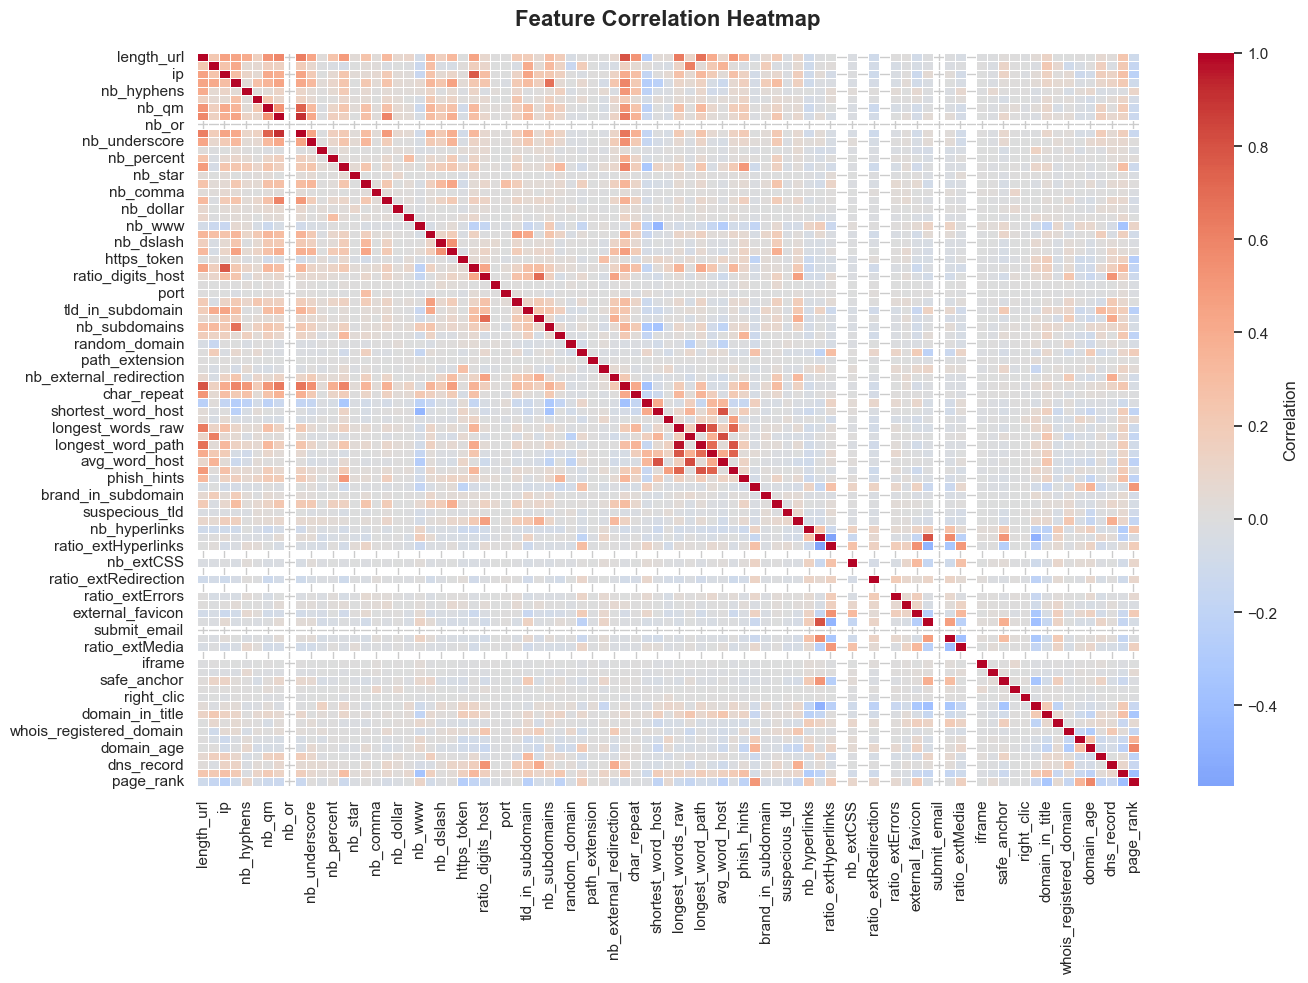


Use this heatmap to identify:
  Highly correlated features (multicollinearity)
  Features with strong correlation to target variable
  Redundant features that can be removed


In [30]:
# Correlation heatmap for numerical features
print("\nFeature Correlation Heatmap")

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nUse this heatmap to identify:")
print("  Highly correlated features (multicollinearity)")
print("  Features with strong correlation to target variable")
print("  Redundant features that can be removed")

In [31]:
# Find highly correlated feature pairs
print("\n🔗 Highly Correlated Feature Pairs (|r| > 0.8):")
corr_matrix = numeric_df.corr()
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs, 
                                 columns=['Feature 1', 'Feature 2', 'Correlation'])
    high_corr_df = high_corr_df.sort_values('Correlation', ascending=False, key=abs)
    print(high_corr_df.to_string(index=False))
    print(f"\nTotal high correlation pairs: {len(high_corr_pairs)}")
else:
    print("No highly correlated feature pairs found (threshold: 0.8)")


🔗 Highly Correlated Feature Pairs (|r| > 0.8):
         Feature 1         Feature 2  Correlation
 longest_words_raw longest_word_path         0.97
            nb_and             nb_eq         0.91
 longest_word_host     avg_word_host         0.82
shortest_word_host     avg_word_host         0.80

Total high correlation pairs: 4


## Week 1 Summary

### Key Findings:
- Dataset structure and basic statistics explored
- Missing values and duplicates identified
- Target variable distribution analyzed
- Feature correlations examined

---

---
# WEEK 2: Descriptive Statistics & Visual Analysis
---

## 2.1 Comprehensive Descriptive Statistics

In [32]:
# Numerical features statistics
print("\n Descriptive Statistics for Numerical Features:")
numerical_features = df.select_dtypes(include=[np.number])
desc_stats = numerical_features.describe().T
desc_stats['variance'] = numerical_features.var()
desc_stats['range'] = desc_stats['max'] - desc_stats['min']
display(desc_stats)


 Descriptive Statistics for Numerical Features:


,count,mean,std,min,25%,50%,75%,max,variance,range
length_url,11430.00,61.13,55.30,12.00,33.00,47.00,71.00,1641.00,3057.79,1629.00
length_hostname,11430.00,21.09,10.78,4.00,15.00,19.00,24.00,214.00,116.15,210.00
ip,11430.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00,0.13,1.00
nb_dots,11430.00,2.48,1.37,1.00,2.00,2.00,3.00,24.00,1.88,23.00
nb_hyphens,11430.00,1.00,2.09,0.00,0.00,0.00,1.00,43.00,4.36,43.00
nb_at,11430.00,0.02,0.16,0.00,0.00,0.00,0.00,4.00,0.02,4.00
nb_qm,11430.00,0.14,0.36,0.00,0.00,0.00,0.00,3.00,0.13,3.00
nb_and,11430.00,0.16,0.82,0.00,0.00,0.00,0.00,19.00,0.67,19.00
nb_or,11430.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
nb_eq,11430.00,0.29,1.00,0.00,0.00,0.00,0.00,19.00,1.00,19.00


In [33]:
# Features with highest variance
print("\nTop 10 Features by Variance:")
variance_df = pd.DataFrame({
    'Feature': numerical_features.columns,
    'Variance': numerical_features.var().values
}).sort_values('Variance', ascending=False).head(10)
print(variance_df.to_string(index=False))
print("\n High variance features may be more informative for prediction.")


Top 10 Features by Variance:
                   Feature         Variance
               web_traffic 3982443394217.52
                domain_age       9658325.12
domain_registration_length        663849.20
             nb_hyperlinks         27808.32
                length_url          3057.79
            ratio_intMedia          2139.05
             links_in_tags          1724.17
               safe_anchor          1526.73
            ratio_extMedia          1473.53
         longest_word_path           532.59

 High variance features may be more informative for prediction.


## 2.2 Distribution Analysis


 Distribution Plots for Top 6 Features by Variance


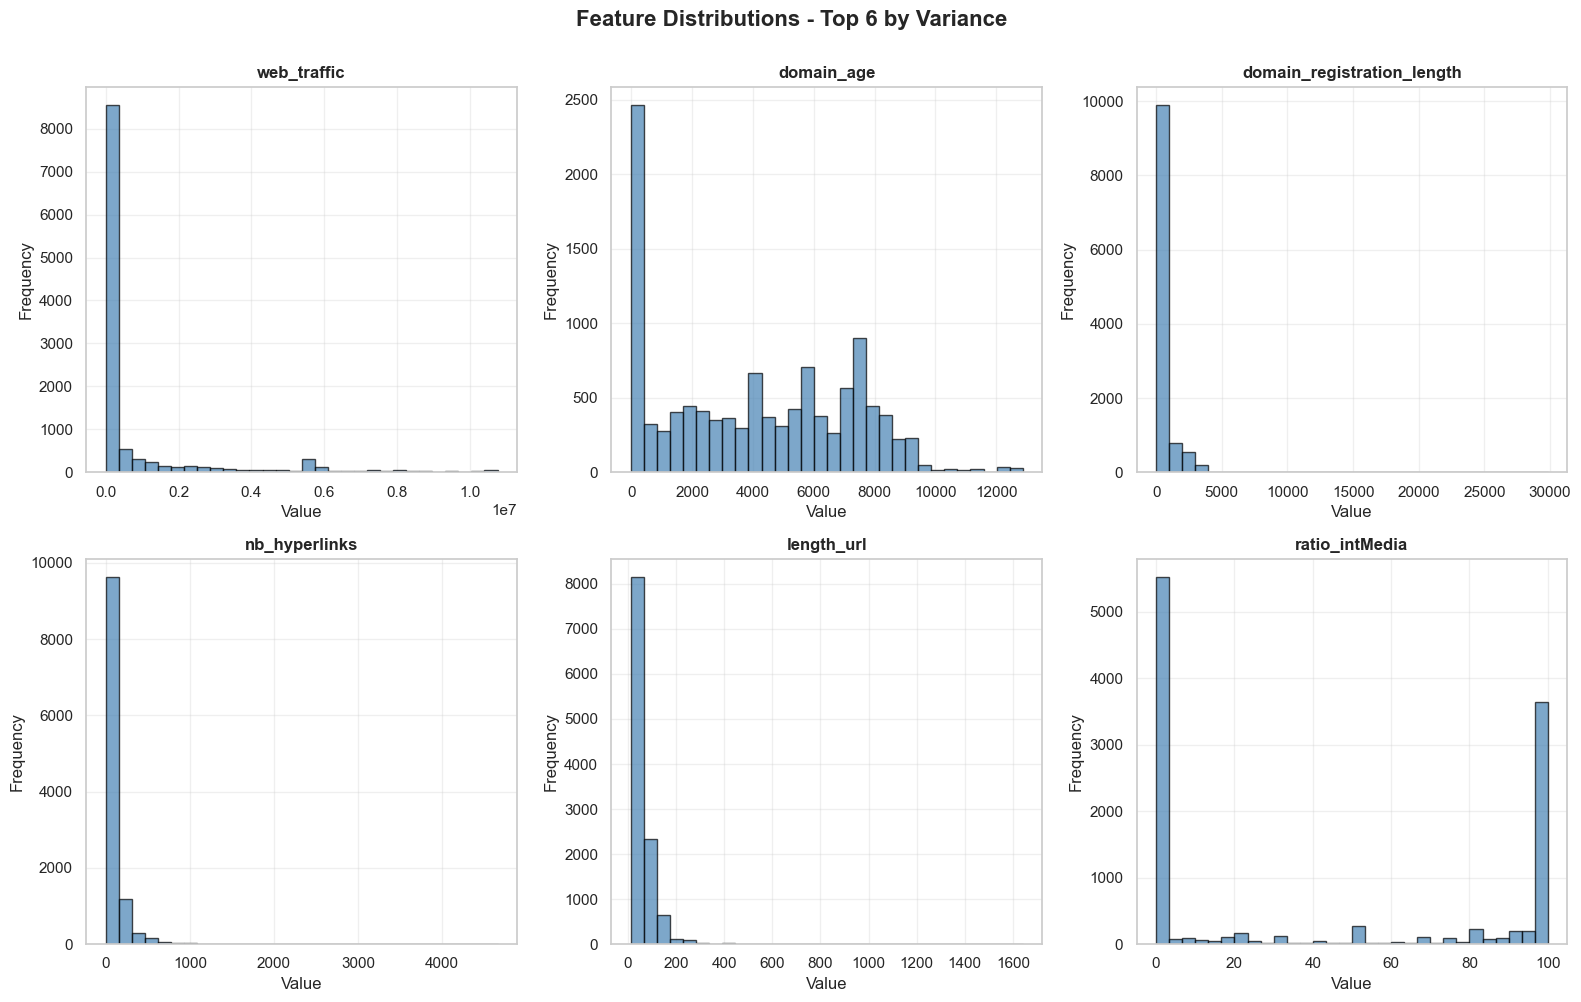


 Observation: Look for skewness and outliers in distributions.


In [34]:
# Select top features by variance for visualization
top_features = variance_df['Feature'].head(6).tolist()

print(f"\n Distribution Plots for Top 6 Features by Variance")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    axes[idx].hist(df[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Feature Distributions - Top 6 by Variance', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n Observation: Look for skewness and outliers in distributions.")

In [35]:
# Skewness analysis
print("\n Skewness Analysis (Top 15 Most Skewed Features):")
print("="*70)
skewness = numerical_features.skew().sort_values(ascending=False, key=abs)
skewness_df = pd.DataFrame({
    'Feature': skewness.index,
    'Skewness': skewness.values
}).head(15)
print(skewness_df.to_string(index=False))
print("\n Skewness interpretation:")
print("   |skew| < 0.5  : Fairly symmetric")
print("   0.5 < |skew| < 1 : Moderately skewed")
print("   |skew| > 1   : Highly skewed")


 Skewness Analysis (Top 15 Most Skewed Features):
                Feature  Skewness
         path_extension     75.59
              nb_dollar     55.66
               punycode     53.43
                nb_star     37.76
             nb_percent     35.42
               nb_comma     31.69
            onmouseover     29.61
                 iframe     27.55
             right_clic     26.68
               nb_space     25.42
              nb_extCSS     23.50
                   port     20.50
nb_external_redirection     17.74
          nb_semicolumn     16.16
            char_repeat     15.76

 Skewness interpretation:
   |skew| < 0.5  : Fairly symmetric
   0.5 < |skew| < 1 : Moderately skewed
   |skew| > 1   : Highly skewed


## 2.3 Feature Relationships (Pair Plots)


 Pair Plot Analysis (Top 5 Features + Target)


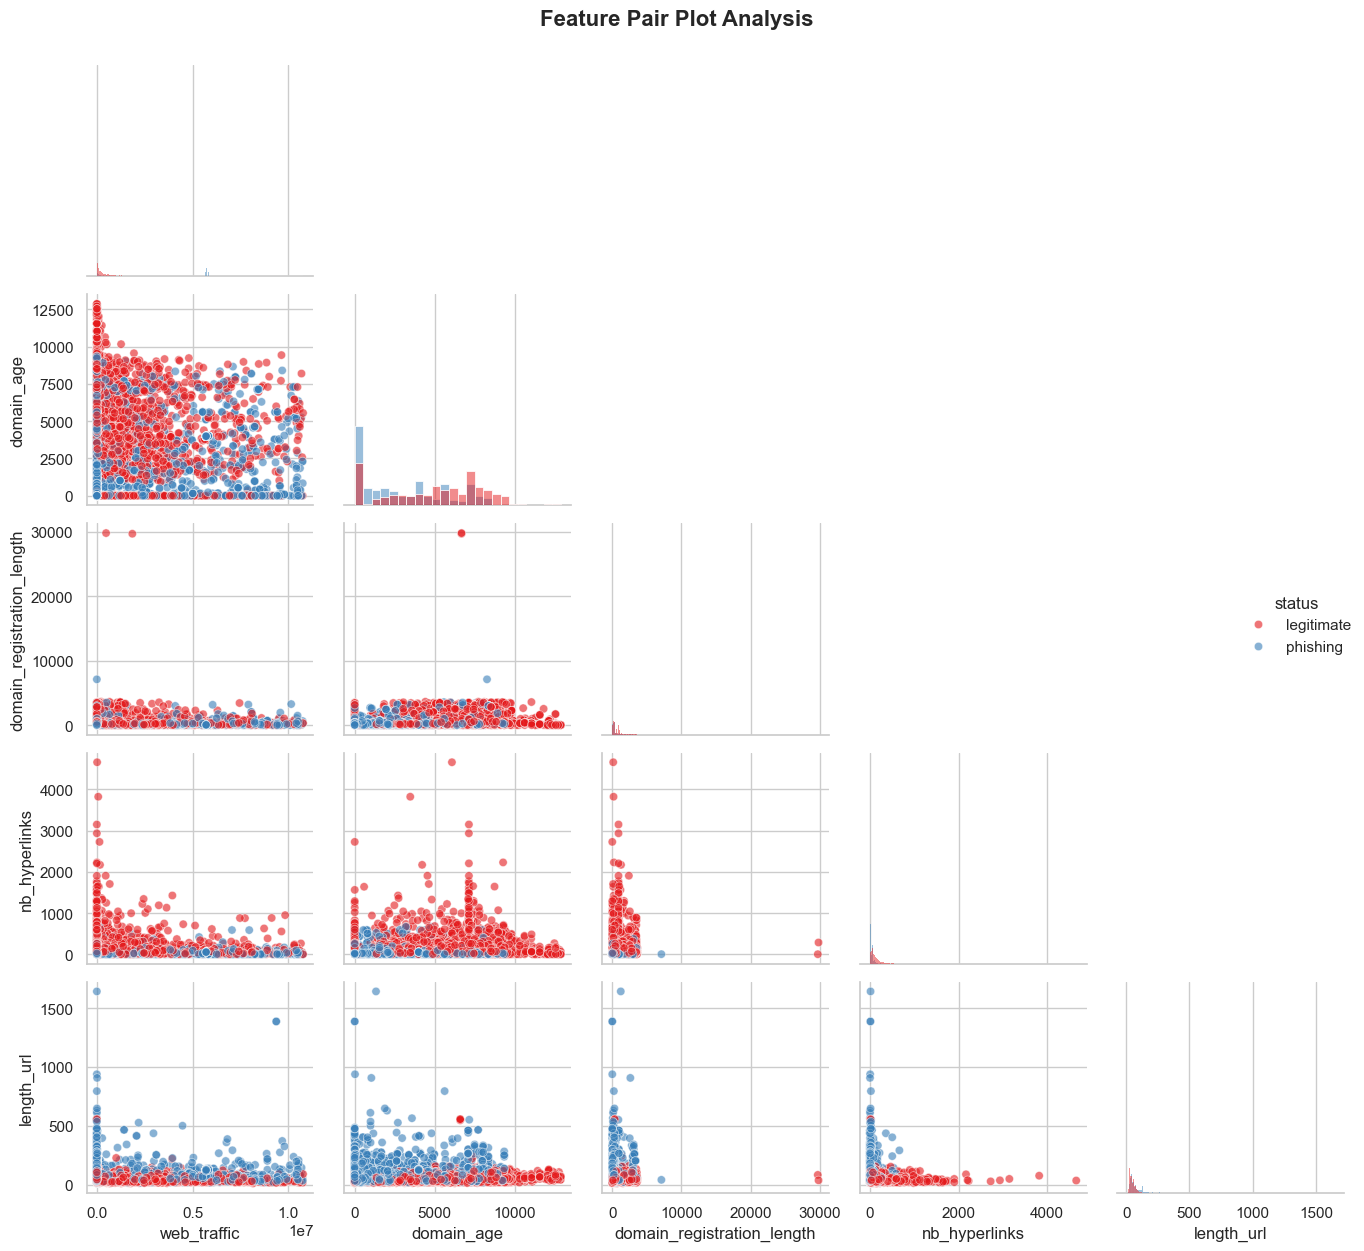


 Use pair plots to identify:
   Linear/non-linear relationships between features
   Feature separability for classification
   Potential feature interactions


In [36]:
# Pairplot for selected features
print("\n Pair Plot Analysis (Top 5 Features + Target)")
selected_features = top_features[:5] + [target_col]
pairplot_data = df[selected_features]

sns.pairplot(pairplot_data, hue=target_col, palette='Set1', 
             diag_kind='hist', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Feature Pair Plot Analysis', y=1.00, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n Use pair plots to identify:")
print("   Linear/non-linear relationships between features")
print("   Feature separability for classification")
print("   Potential feature interactions")

## 2.4 Outlier Detection


Box Plots for Outlier Detection (Top 6 Features)


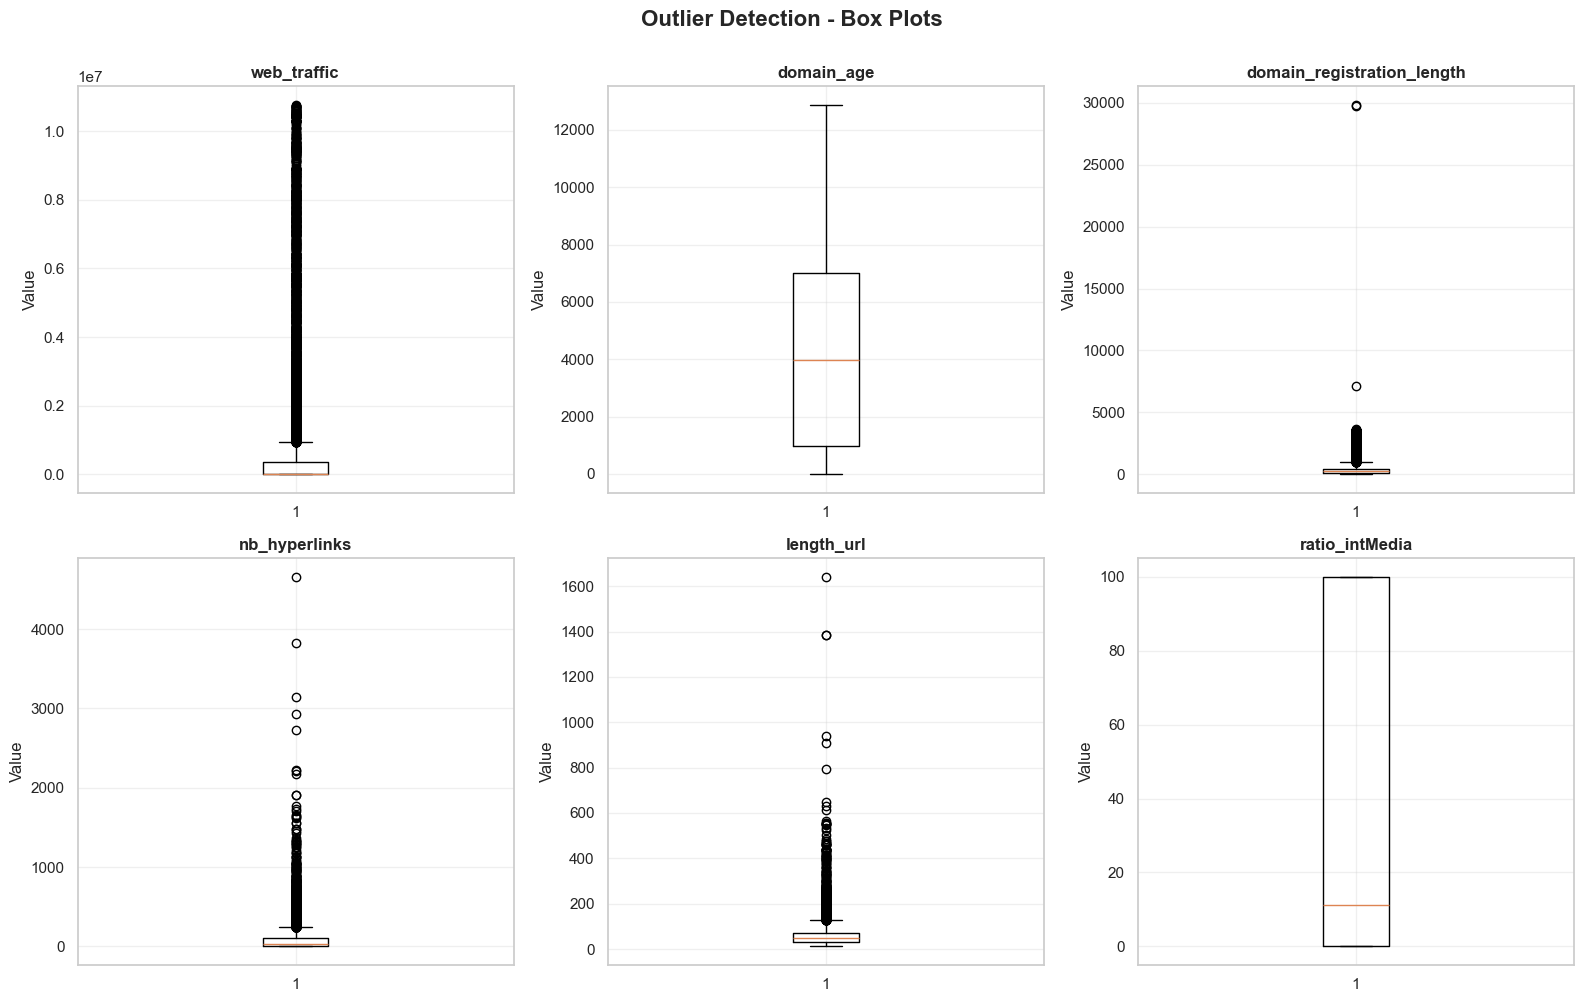


 Outliers appear as points outside the whiskers.
   Consider outlier handling strategies during preprocessing.


In [37]:
# Box plots for outlier detection
print("\nBox Plots for Outlier Detection (Top 6 Features)")
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    axes[idx].boxplot(df[feature].dropna(), vert=True)
    axes[idx].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n Outliers appear as points outside the whiskers.")
print("   Consider outlier handling strategies during preprocessing.")

## 2.5 Feature Importance (Correlation with Target)


 Feature Correlation with Target Variable


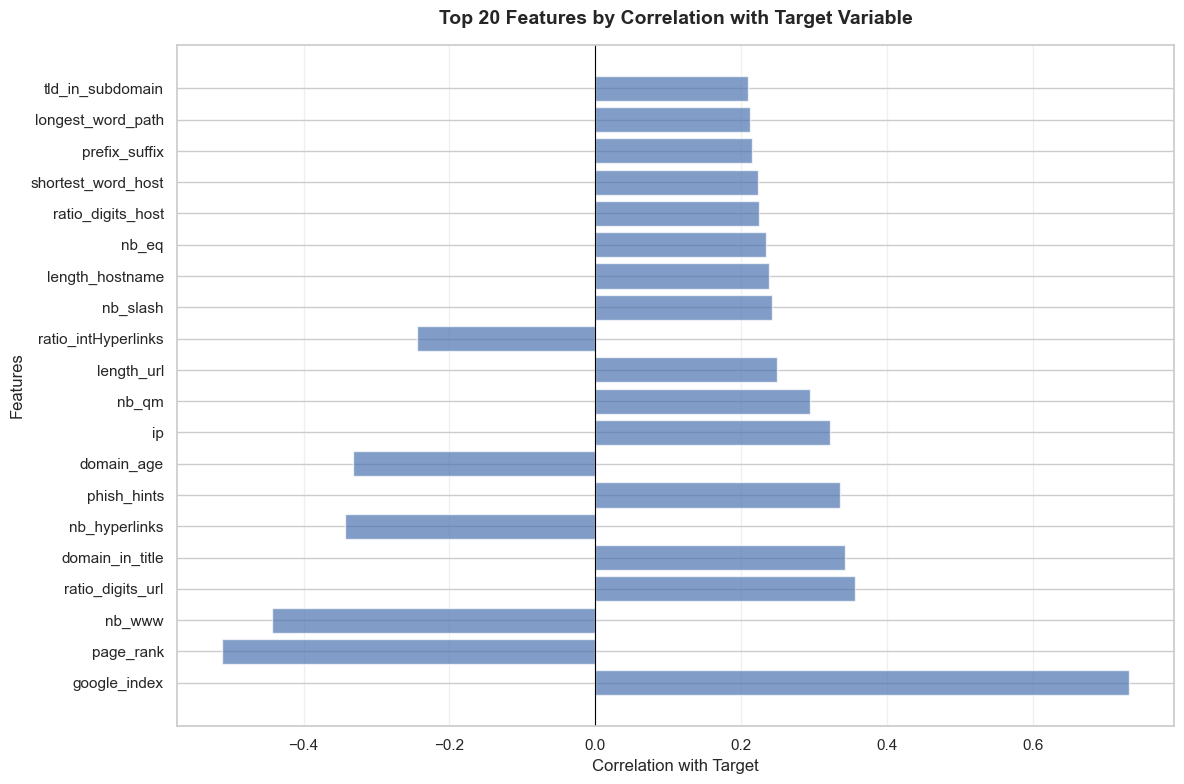


Top 15 Most Correlated Features:
            Feature  Correlation
       google_index         0.73
          page_rank        -0.51
             nb_www        -0.44
   ratio_digits_url         0.36
    domain_in_title         0.34
      nb_hyperlinks        -0.34
        phish_hints         0.34
         domain_age        -0.33
                 ip         0.32
              nb_qm         0.29
         length_url         0.25
ratio_intHyperlinks        -0.24
           nb_slash         0.24
    length_hostname         0.24
              nb_eq         0.23

 Features with high absolute correlation values are strong predictors of phishing behavior.


In [40]:

print("\n Feature Correlation with Target Variable")
# --- Step 1: Encode target variable if it is categorical ---
if df[target_col].dtype == 'object':
    df[target_col] = df[target_col].map({
        'legitimate': 0,
        'phishing': 1
    })

# --- Step 2: Select only numeric features (exclude target later) ---
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# --- Step 3: Compute correlation with target ---
target_corr = (
    numerical_features
    .drop(columns=[target_col], errors='ignore')
    .corrwith(df[target_col])
    .sort_values(ascending=False, key=abs)
)

# --- Step 4: Convert to DataFrame ---
target_corr_df = pd.DataFrame({
    'Feature': target_corr.index,
    'Correlation': target_corr.values
})

# --- Step 5: Plot top 20 correlated features ---
plt.figure(figsize=(12, 8))

top_20_corr = target_corr_df.head(20)
colors = ['green' if x > 0 else 'red' for x in top_20_corr['Correlation']]

plt.barh(top_20_corr['Feature'], top_20_corr['Correlation'], alpha=0.7)
plt.xlabel('Correlation with Target', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title(
    'Top 20 Features by Correlation with Target Variable',
    fontsize=14,
    fontweight='bold',
    pad=15
)
plt.axvline(x=0, color='black', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Step 6: Display top correlated features
print("\nTop 15 Most Correlated Features:")
print(target_corr_df.head(15).to_string(index=False))

print("\n Features with high absolute correlation values are strong predictors of phishing behavior.")


## 2.6 Week 2 Insights & Recommendations

In [41]:

print("WEEK 2: KEY INSIGHTS & RECOMMENDATIONS")


print("\n Statistical Insights:")
print("    High variance observed in URL and symbol-based features")
print("    Several numerical features show right-skewed distributions")
print("    Strong correlations detected among some features (multicollinearity)")
print("    Dataset shows no significant missing values")

print("\n Preprocessing Recommendations:")
print("    Feature scaling required (StandardScaler/MinMaxScaler)")
print("    Feature selection to handle multicollinearity")
print("    Consider log transformation for skewed features")
print("    Outlier handling if necessary")
print("    Dataset appears balanced; no resampling required")


print("Week 2 Descriptive Statistics & Visual Analysis Completed")


WEEK 2: KEY INSIGHTS & RECOMMENDATIONS

 Statistical Insights:
    High variance observed in URL and symbol-based features
    Several numerical features show right-skewed distributions
    Strong correlations detected among some features (multicollinearity)
    Dataset shows no significant missing values

 Preprocessing Recommendations:
    Feature scaling required (StandardScaler/MinMaxScaler)
    Feature selection to handle multicollinearity
    Consider log transformation for skewed features
    Outlier handling if necessary
    Dataset appears balanced; no resampling required
Week 2 Descriptive Statistics & Visual Analysis Completed


---
# WEEK 3: Data Preprocessing & Model Preparation
---

## 3.1 Data Cleaning

In [42]:
print("\n STEP 1: DATA CLEANING")

# Create a copy for preprocessing
df_clean = df.copy()

# Handle missing values
print("\n Handling Missing Values...")
missing_before = df_clean.isnull().sum().sum()
print(f"Total missing values before: {missing_before}")

if missing_before > 0:
    # Numerical features: median imputation
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    num_imputer = SimpleImputer(strategy='median')
    df_clean[numerical_cols] = num_imputer.fit_transform(df_clean[numerical_cols])
    
    # Categorical features: mode imputation
    categorical_cols = df_clean.select_dtypes(include='object').columns
    if len(categorical_cols) > 0:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df_clean[categorical_cols] = cat_imputer.fit_transform(df_clean[categorical_cols])
    
    print(f"✓ Missing values imputed successfully")
else:
    print(" No missing values found")

missing_after = df_clean.isnull().sum().sum()
print(f"Total missing values after: {missing_after}")


 STEP 1: DATA CLEANING

 Handling Missing Values...
Total missing values before: 0
 No missing values found
Total missing values after: 0


In [43]:
# Remove duplicates
print("\n Removing Duplicate Records...")
records_before = len(df_clean)
df_clean = df_clean.drop_duplicates()
records_after = len(df_clean)
duplicates_removed = records_before - records_after

print(f"Records before: {records_before:,}")
print(f"Records after: {records_after:,}")
print(f"Duplicates removed: {duplicates_removed}")
print(f"Data retention: {(records_after/records_before)*100:.2f}%")


 Removing Duplicate Records...
Records before: 11,430
Records after: 11,430
Duplicates removed: 0
Data retention: 100.00%


## 3.2 Feature Encoding

In [46]:
print("\n STEP 2: FEATURE ENCODING")
# Separate features and target
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col].copy()

print(f"\nFeature shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Identify categorical columns (if any)
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nNumerical features: {len(numerical_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

if len(categorical_cols) > 0:
    print("\nCategorical columns found:")
    for col in categorical_cols:
        unique_count = X[col].nunique()
        print(f"  • {col}: {unique_count} unique values")
        
        # Apply appropriate encoding based on cardinality
        if unique_count == 2:
            # Binary: Label Encoding
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            print(f"    → Applied Label Encoding")
        elif unique_count <= 10:
            # Low cardinality: One-Hot Encoding
            X = pd.get_dummies(X, columns=[col], drop_first=True)
            print(f"    → Applied One-Hot Encoding")
        else:
            # High cardinality: Label Encoding
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            print(f"    → Applied Label Encoding (high cardinality)")
else:
    print("\n✓ No categorical features to encode (all features are numerical)")

# Encode target variable if categorical
if y.dtype == 'object':
    print(f"\nEncoding target variable '{target_col}'...")
    le_target = LabelEncoder()
    y = pd.Series(le_target.fit_transform(y), name=target_col)
    print(f" Target encoded: {list(le_target.classes_)} → {list(range(len(le_target.classes_)))}")

print(f"\nFinal feature shape after encoding: {X.shape}")


 STEP 2: FEATURE ENCODING

Feature shape: (11430, 88)
Target shape: (11430,)

Numerical features: 87
Categorical features: 1

Categorical columns found:
  • url: 11429 unique values
    → Applied Label Encoding (high cardinality)

Final feature shape after encoding: (11430, 88)


## 3.3 Feature Scaling (Normalization)

In [47]:
print("\n STEP 3: FEATURE SCALING")

print("\nStatistics BEFORE Scaling (first 5 features):")
display(X.iloc[:, :5].describe().loc[['mean', 'std', 'min', 'max']])

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("\nStatistics AFTER Scaling (first 5 features):")
display(X_scaled.iloc[:, :5].describe().loc[['mean', 'std', 'min', 'max']])

print("\n StandardScaler applied successfully")
print("   Mean ≈ 0")
print("   Standard Deviation ≈ 1")


 STEP 3: FEATURE SCALING

Statistics BEFORE Scaling (first 5 features):


,url,length_url,length_hostname,ip,nb_dots
mean,5713.59,61.13,21.09,0.15,2.48
std,3299.55,55.30,10.78,0.36,1.37
min,0.00,12.00,4.00,0.00,1.00
max,11428.00,1641.00,214.00,1.00,24.00



Statistics AFTER Scaling (first 5 features):


,url,length_url,length_hostname,ip,nb_dots
mean,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.73,-0.89,-1.59,-0.42,-1.08
max,1.73,28.57,17.90,2.38,15.71



 StandardScaler applied successfully
   Mean ≈ 0
   Standard Deviation ≈ 1



 Visualization: Before vs After Scaling


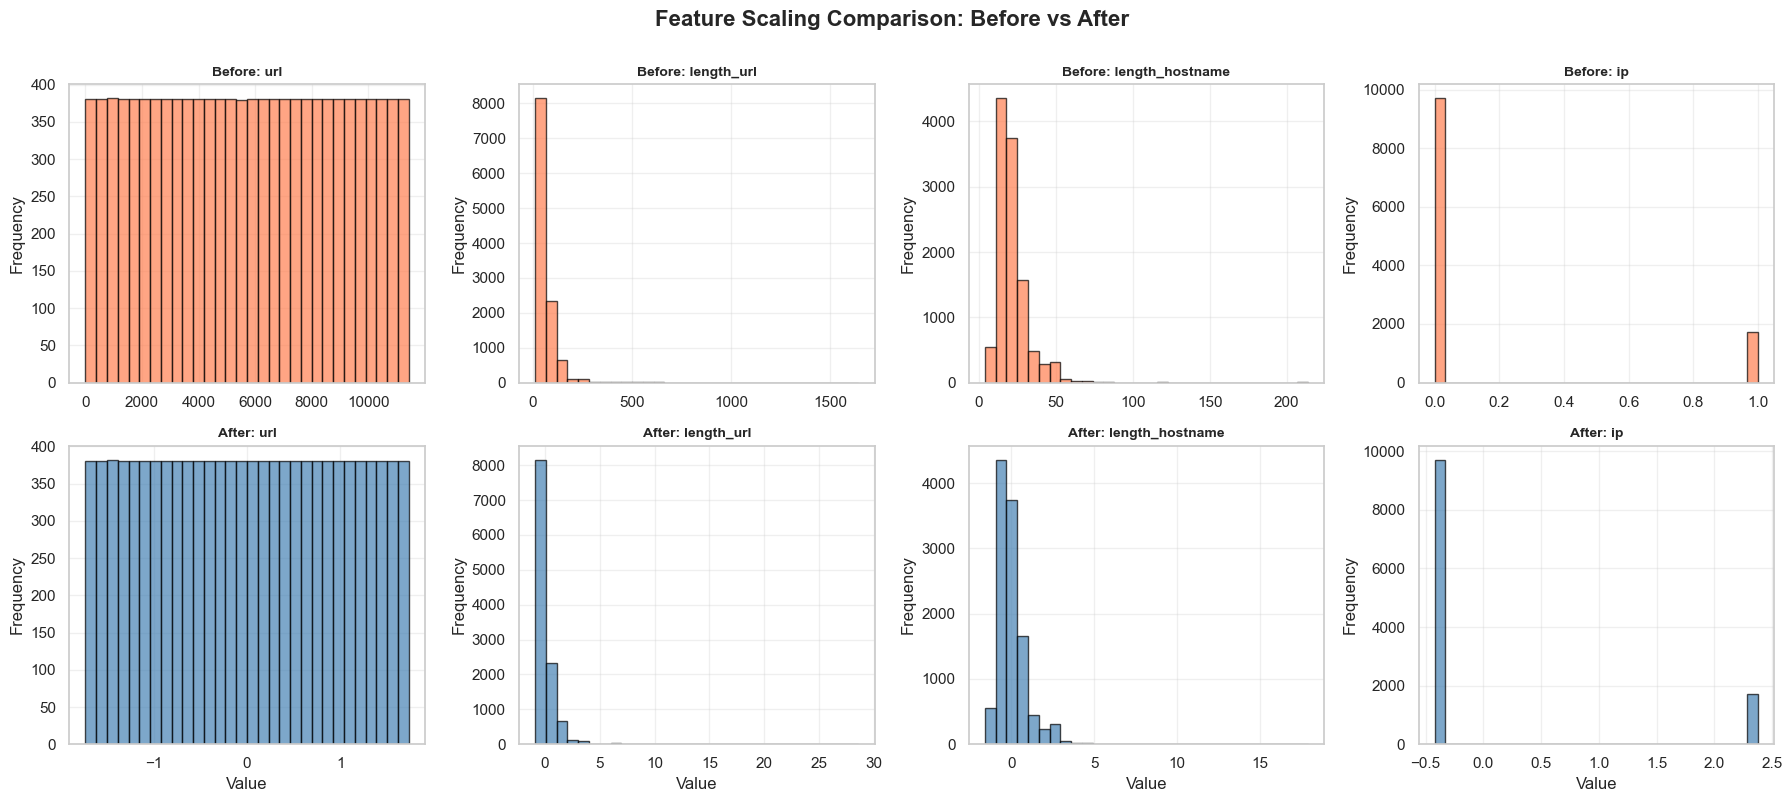


 Scaling preserves distribution shape while standardizing scale.


In [48]:
# Visualize before/after scaling
print("\n Visualization: Before vs After Scaling")

# Select first 4 features for comparison
sample_features = X.columns[:4]

fig, axes = plt.subplots(2, 4, figsize=(18, 8))

for idx, feature in enumerate(sample_features):
    # Before scaling
    axes[0, idx].hist(X[feature], bins=30, edgecolor='black', alpha=0.7, color='coral')
    axes[0, idx].set_title(f'Before: {feature}', fontsize=10, fontweight='bold')
    axes[0, idx].set_ylabel('Frequency')
    axes[0, idx].grid(True, alpha=0.3)
    
    # After scaling
    axes[1, idx].hist(X_scaled[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[1, idx].set_title(f'After: {feature}', fontsize=10, fontweight='bold')
    axes[1, idx].set_xlabel('Value')
    axes[1, idx].set_ylabel('Frequency')
    axes[1, idx].grid(True, alpha=0.3)

plt.suptitle('Feature Scaling Comparison: Before vs After', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n Scaling preserves distribution shape while standardizing scale.")

## 3.4 Train-Test Split

In [50]:
print("\n✂️ STEP 4: TRAIN-TEST SPLIT")
print("="*70)

# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("\n📊 Dataset Split Summary:")
print(f"\nTraining Set:")
print(f"  • Features: {X_train.shape}")
print(f"  • Target: {y_train.shape}")
print(f"  • Samples: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")

print(f"\nTesting Set:")
print(f"  • Features: {X_test.shape}")
print(f"  • Target: {y_test.shape}")
print(f"  • Samples: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nTotal Dataset: {len(X):,} samples")
print("="*70)


✂️ STEP 4: TRAIN-TEST SPLIT

📊 Dataset Split Summary:

Training Set:
  • Features: (9144, 88)
  • Target: (9144,)
  • Samples: 9,144 (80.0%)

Testing Set:
  • Features: (2286, 88)
  • Target: (2286,)
  • Samples: 2,286 (20.0%)

Total Dataset: 11,430 samples



 Stratification Verification:

Original Dataset - Class Distribution:
  Class 0: 50.00%
  Class 1: 50.00%

Training Set - Class Distribution:
  Class 0: 50.00%
  Class 1: 50.00%

Testing Set - Class Distribution:
  Class 0: 50.00%
  Class 1: 50.00%


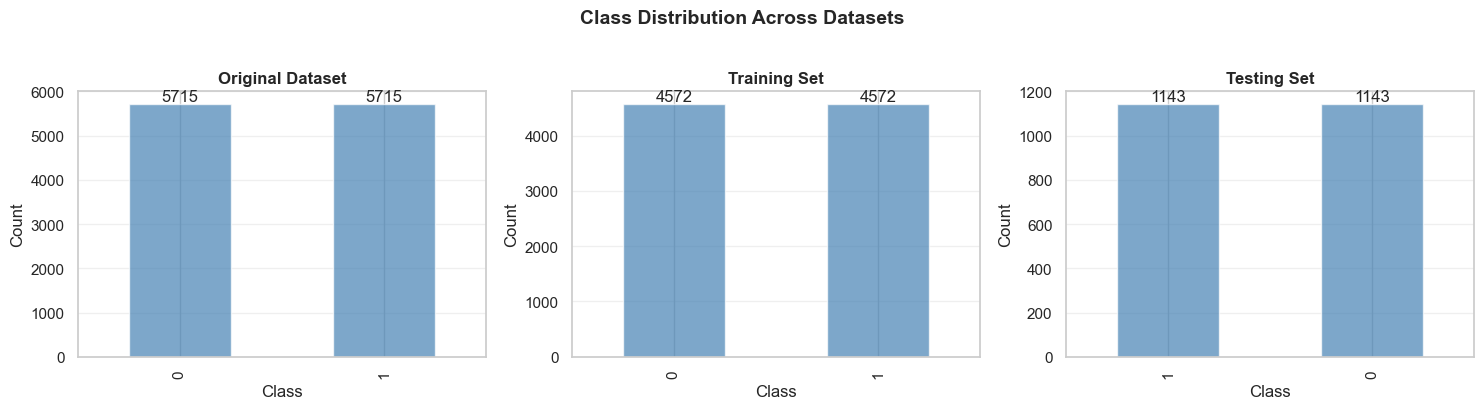


 Stratification successful - class distributions are balanced


In [51]:
# Verify stratification
print("\n Stratification Verification:")
print("="*70)

print("\nOriginal Dataset - Class Distribution:")
original_dist = pd.Series(y).value_counts(normalize=True).sort_index() * 100
for cls, pct in original_dist.items():
    print(f"  Class {cls}: {pct:.2f}%")

print("\nTraining Set - Class Distribution:")
train_dist = pd.Series(y_train).value_counts(normalize=True).sort_index() * 100
for cls, pct in train_dist.items():
    print(f"  Class {cls}: {pct:.2f}%")

print("\nTesting Set - Class Distribution:")
test_dist = pd.Series(y_test).value_counts(normalize=True).sort_index() * 100
for cls, pct in test_dist.items():
    print(f"  Class {cls}: {pct:.2f}%")

# Visualize class distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

datasets = [
    (y, 'Original Dataset'),
    (y_train, 'Training Set'),
    (y_test, 'Testing Set')
]

for idx, (data, title) in enumerate(datasets):
    pd.Series(data).value_counts().plot.bar(ax=axes[idx], color='steelblue', alpha=0.7)
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Class')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add count labels
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%d')

plt.suptitle('Class Distribution Across Datasets', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n Stratification successful - class distributions are balanced")

## 3.5 Save Preprocessed Data

In [ ]:
print("\n STEP 5: SAVING PREPROCESSED DATA")
# Save training and testing sets
X_train.to_csv('X_train_scaled.csv', index=False)
pd.DataFrame(y_train, columns=[target_col]).to_csv('y_train.csv', index=False)
X_test.to_csv('X_test_scaled.csv', index=False)
pd.DataFrame(y_test, columns=[target_col]).to_csv('y_test.csv', index=False)

# Save complete preprocessed dataset
preprocessed_df = X_scaled.copy()
preprocessed_df[target_col] = y.values
preprocessed_df.to_csv('dataset_phishing_preprocessed.csv', index=False)

# Save feature names
pd.DataFrame({'Feature_Name': X.columns}).to_csv('feature_names.csv', index=False)

print("\n✓ Files saved successfully:")
print("  1. X_train_scaled.csv")
print("  2. y_train.csv")
print("  3. X_test_scaled.csv")
print("  4. y_test.csv")
print("  5. dataset_phishing_preprocessed.csv")
print("  6. feature_names.csv")

## 3.6 Preprocessing Pipeline Summary

In [54]:
print("\n" + "="*70)
print("COMPLETE PREPROCESSING PIPELINE SUMMARY")
print("="*70)

summary_data = {
    'Stage': [
        '1. Data Loading',
        '2. Data Cleaning',
        '3. Feature Encoding',
        '4. Feature Scaling',
        '5. Train-Test Split'
    ],
    'Action': [
        f'Loaded {df.shape[0]:,} records with {df.shape[1]} features',
        f'Handled missing values, removed {duplicates_removed} duplicates',
        f'Encoded categorical features, final: {X.shape[1]} features',
        'Applied StandardScaler (mean=0, std=1)',
        f'Split: {len(X_train):,} train / {len(X_test):,} test (80-20)'
    ],
    'Status': ['✓', '✓', '✓', '✓', '✓']
}

summary_df = pd.DataFrame(summary_data)
print("\n" + summary_df.to_string(index=False))


print("DATA PREPROCESSING COMPLETED SUCCESSFULLY")

print("\n✓ Dataset is now ready for machine learning model training!")
print("\n Quick Stats:")
print(f"    Total Features: {X_train.shape[1]}")
print(f"    Training Samples: {len(X_train):,}")
print(f"    Testing Samples: {len(X_test):,}")
print(f"    Target Classes: {len(np.unique(y))}")
print(f"    Data Quality: Excellent (no missing values)")
print(f"    Balance: {(pd.Series(y).value_counts().min() / pd.Series(y).value_counts().max() * 100):.1f}%")



COMPLETE PREPROCESSING PIPELINE SUMMARY

              Stage                                           Action Status
    1. Data Loading           Loaded 11,430 records with 89 features      ✓
   2. Data Cleaning     Handled missing values, removed 0 duplicates      ✓
3. Feature Encoding Encoded categorical features, final: 88 features      ✓
 4. Feature Scaling           Applied StandardScaler (mean=0, std=1)      ✓
5. Train-Test Split          Split: 9,144 train / 2,286 test (80-20)      ✓
DATA PREPROCESSING COMPLETED SUCCESSFULLY

✓ Dataset is now ready for machine learning model training!

 Quick Stats:
    Total Features: 88
    Training Samples: 9,144
    Testing Samples: 2,286
    Target Classes: 2
    Data Quality: Excellent (no missing values)
    Balance: 100.0%
